In [1]:
from simulator import *

In [2]:
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
sns.set_style('white')

Settings
--------

In [3]:
# resolution
res_x = 1920 # pixels
res_y = 1440 # pixels

# normalized focal length
f = 0.5 / np.tan(np.deg2rad(10) / 2)

# pixel aspect ratio
pixel_ar = 1

# normalized principal point
ppx = 0.5
ppy = 0.5

gaussian_noise_sigma = 20e-6 # rad

cam = 0

In [4]:
# magnitude parameters

A_pixel = 525 # photonelectrons/s mm
sigma_pixel = 525 # photonelectrons/s mm

sigma_psf = 0.5 # pixel
t_exp = 0.2 # s
aperture = 15 # mm

base_photons = 19100 # photoelectrons per mm² and second of a magnitude 0 G2 star

magnitude_gaussian = 0.01 # mag

In [5]:
# star count

min_true = 3
max_true = 100
min_false = 0
max_false = 10

Base Objects
--------

In [6]:
catalog = StarCatalog()

In [7]:
cameras = [
    RectilinearCamera,
    EquidistantCamera,
    EquisolidAngleCamera,
    StereographicCamera,
    OrthographicCamera,
]

camera = cameras[cam](f, (res_x, res_y), pixel_ar, (ppx, ppy))

In [8]:
detector = StarDetector(A_pixel, sigma_pixel, sigma_psf, t_exp, aperture, base_photons)

Scene Creation
------------

In [9]:
num_scenes = 100

In [10]:
inputs = []
outputs = []

for i in range(num_scenes):
    scene = Scene.random(catalog, camera, detector, min_true, max_true, min_false, max_false, gaussian_noise_sigma=gaussian_noise_sigma, magnitude_gaussian=magnitude_gaussian)
    
    inputs.append(np.hstack((scene.pos[::, ::-1], scene.magnitudes.reshape(-1, 1))).flatten())
    outputs.append(scene.ids)

In [11]:
def write_csv(filename, lines):
    with open(filename, 'w') as f:
        for line in lines:
            f.write(','.join(str(value) for value in line) + '\n')

In [12]:
write_csv('input_sample.csv', inputs)
write_csv('result_sample.csv', outputs)

### Render the last scene

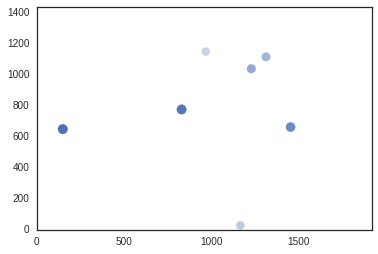

In [13]:
_ = scene.render(False)